<a href="https://colab.research.google.com/github/chaitanyasinghnegi/SQCC-Recruitment-Task/blob/main/StockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

- Pandas
- Numpy
- SKLearn


In [295]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

Read csv

In [296]:
data = pd.read_csv('./nifty_500.csv')
data.head()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

# Data Preprocessing

Multiple objects classes detected, type-casting to float.
Replacing all '-' values with NaN for easier data population.

In [298]:
data.replace('-',np.NaN,inplace=True)

In [299]:
data['Change'] = data['Change'].map(lambda x: float(str(x).replace(',', '')) if isinstance(x, str) else float(x))

In [300]:
data['Percentage Change'] = data['Percentage Change'].map(lambda x: float(str(x).replace(',', '')) if isinstance(x, str) else float(x))


In [301]:
data['365 Day Percentage Change'] = data['365 Day Percentage Change'].map(lambda x: float(str(x).replace(',', '')) if isinstance(x, str) else float(x))


In [302]:
data['30 Day Percentage Change'] = data['30 Day Percentage Change'].map(lambda x: float(str(x).replace(',', '')) if isinstance(x, str) else float(x))


In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     498 non-null    float64
 10  Percentage Change          498 non-null    float64
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

In [304]:
data.isnull().sum()

,0
Company Name,0
Symbol,0
Industry,0
Series,0
Open,0
High,0
Low,0
Previous Close,0
Last Traded Price,0
Change,3


Populating NaN values with mean of column

In [305]:
cols = ["Change","Percentage Change","365 Day Percentage Change","30 Day Percentage Change"]
for col in cols:
  data[col].fillna(data[col].mean(),inplace=True)

In [306]:
data.isnull().sum()

,0
Company Name,0
Symbol,0
Industry,0
Series,0
Open,0
High,0
Low,0
Previous Close,0
Last Traded Price,0
Change,0


Encoding categorical values - Company Name, Symbol, Industry, Series

In [307]:

le = LabelEncoder()
data['Company Name'] = le.fit_transform(data['Company Name'])
data['Symbol'] = le.fit_transform(data['Symbol'])
data['Industry'] = le.fit_transform(data['Industry'])
data['Series'] = le.fit_transform(data['Series'])
data.head()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,0,0,7,1,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,6,1,11,1,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,7,2,9,1,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,1,3,1,1,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,8,4,11,1,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


# Regression



In [308]:
X = data[["Open","High","Low","Previous Close","Change","Percentage Change","Share Volume","Value (Indian Rupee)","52 Week High","52 Week Low","365 Day Percentage Change","30 Day Percentage Change"]]
y = data["Last Traded Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
l_reg_rmse = rmse
l_reg_mae = mae
score = model.score(X_test,y_test)
print(f"RMSE: {rmse}\nMAE: {mae}\nScore: {score}")

RMSE: 0.09268451536950453
MAE: 0.07925521026878043
Score: 0.9999999992009633


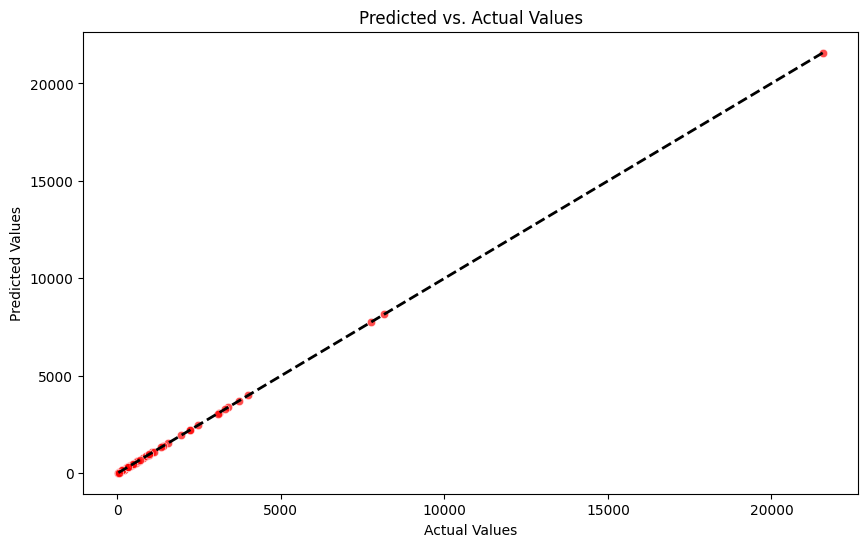

In [309]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7,color='r', edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

Convert Percentage Change to binary target Percentage Change Binary

In [310]:
data['Percentage Change Binary'] = (data['Percentage Change'] > 0).astype(int)
features = data[['Open', 'High', 'Low', 'Previous Close', 'Change', 'Share Volume', 'Value (Indian Rupee)', '52 Week High', '52 Week Low', '365 Day Percentage Change', '30 Day Percentage Change']]
target = data['Percentage Change Binary']


# SVM
SVM model to classify the target

In [311]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1 Score: {f1_svm}")

SVM Accuracy: 0.9108910891089109
SVM Precision: 0.8620689655172413
SVM Recall: 0.9803921568627451
SVM F1 Score: 0.9174311926605505


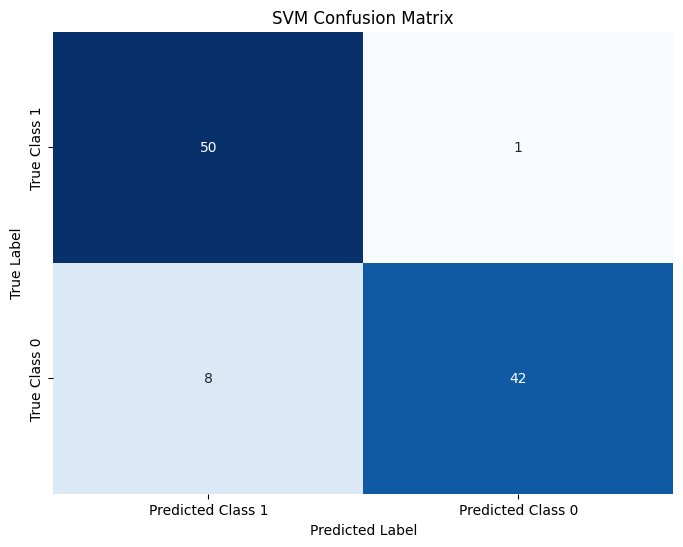

In [312]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_svm = confusion_matrix(y_test, y_pred_svm)

true_neg, false_pos, false_neg, true_pos = cm_svm.ravel()
formatted_cm = [[true_pos, false_neg], [false_pos, true_neg]]

plt.figure(figsize=(8, 6))
sns.heatmap(formatted_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 1', 'Predicted Class 0'],
            yticklabels=['True Class 1', 'True Class 0'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()

# LSVM
LSVM model to classify the target

In [313]:
lsvm_model = LinearSVC(dual=False,max_iter=10000, class_weight='balanced', random_state=42)
lsvm_model.fit(X_train_scaled, y_train)

y_pred_lsvm = lsvm_model.predict(X_test_scaled)
accuracy_lsvm = accuracy_score(y_test, y_pred_lsvm)
precision_lsvm = precision_score(y_test, y_pred_lsvm)
recall_lsvm = recall_score(y_test, y_pred_lsvm)
f1_lsvm = f1_score(y_test, y_pred_lsvm)

print(f"LSVM Accuracy: {accuracy_lsvm}")
print(f"LSVM Precision: {precision_lsvm}")
print(f"LSVM Recall: {recall_lsvm}")
print(f"LSVM F1 Score: {f1_lsvm}")

lsvm_acc = accuracy_lsvm
lsvm_pre = precision_lsvm
lsvm_rec = recall_lsvm
lsvm_f1 = f1_lsvm

LSVM Accuracy: 0.9405940594059405
LSVM Precision: 0.9090909090909091
LSVM Recall: 0.9803921568627451
LSVM F1 Score: 0.9433962264150944


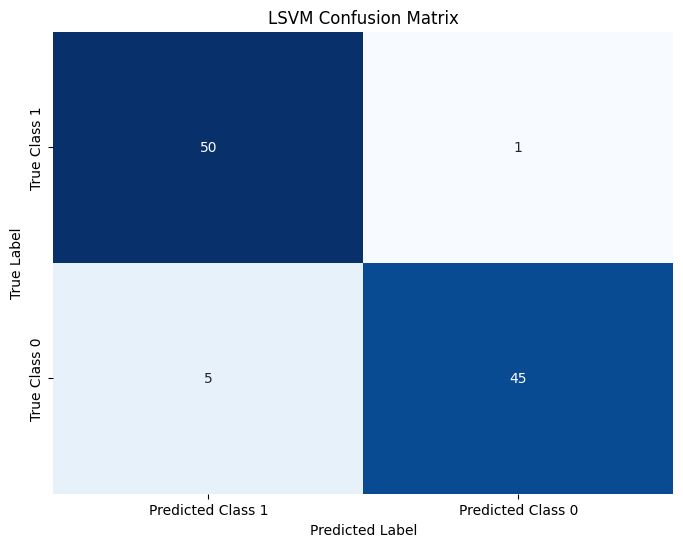

In [314]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_lsvm = confusion_matrix(y_test, y_pred_lsvm)

true_neg, false_pos, false_neg, true_pos = cm_lsvm.ravel()

formatted_cm = [[true_pos, false_neg], [false_pos, true_neg]]

plt.figure(figsize=(8, 6))
sns.heatmap(formatted_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class 1', 'Predicted Class 0'],
            yticklabels=['True Class 1', 'True Class 0'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('LSVM Confusion Matrix')
plt.show()


# Random Forest Regressor
Regressor model for predicting the Last Traded Price

In [315]:
X = data.drop(columns=['Last Traded Price'])
y = data['Last Traded Price']

categorical_features = ['Company Name', 'Symbol', 'Industry', 'Series']
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
score = pipeline.score(X_test,y_test)
print(f"Random Forest Regression RMSE: {rmse}")
print(f"Random Forest Regression MAE: {mae}")
print(f"Random Forest Regression Score: {score}")

rf_reg_rmse = rmse
rf_reg_mae = mae

Random Forest Regression RMSE: 330.6154274084868
Random Forest Regression MAE: 70.29704455445544
Random Forest Regression Score: 0.9894118719938261


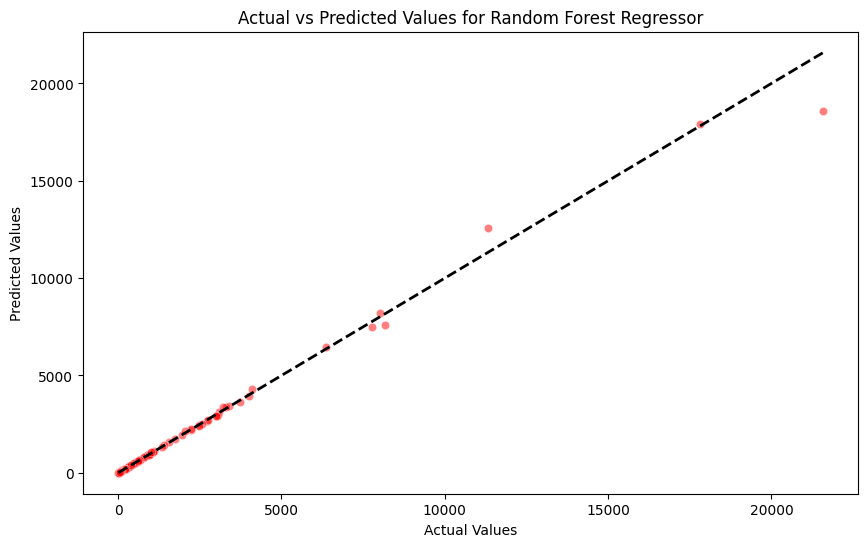

In [316]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5,color='r', edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.show()


# Random Forest Classifier
Classifier model to predict the Percentage Change

In [317]:

X = data.drop(columns=['Percentage Change'])
y = (data['Percentage Change'] > 0).astype(int)

categorical_features = ['Company Name', 'Symbol', 'Industry', 'Series']
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Classification Accuracy: {accuracy}")
print(f"Random Forest Classification Precision: {precision}")
print(f"Random Forest Classification Recall: {recall}")
print(f"Random Forest Classification F1 Score: {f1}")

rf_class_acc = accuracy
rf_class_pre = precision
rf_class_rec = recall
rf_class_f1 = f1

Random Forest Classification Accuracy: 0.9900990099009901
Random Forest Classification Precision: 0.9807692307692307
Random Forest Classification Recall: 1.0
Random Forest Classification F1 Score: 0.9902912621359222


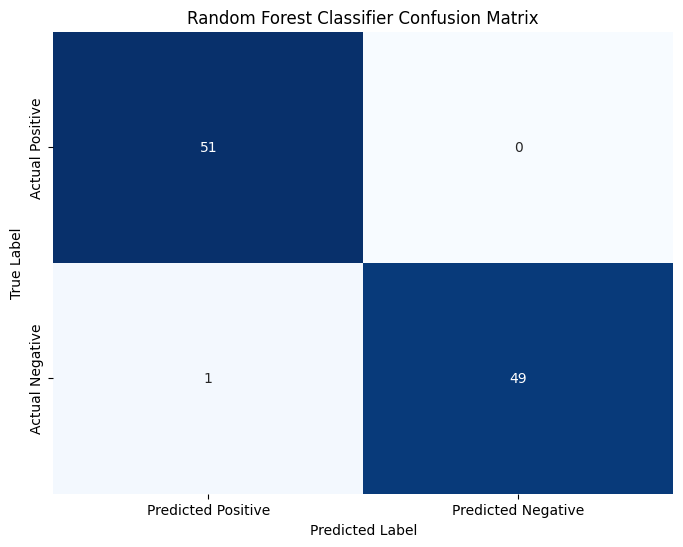

In [318]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred)

true_neg, false_pos, false_neg, true_pos = cm_rf.ravel()

formatted_cm = [[true_pos, false_neg], [false_pos, true_neg]]

plt.figure(figsize=(8, 6))
ax = sns.heatmap(formatted_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                 xticklabels=['Predicted Positive', 'Predicted Negative'],
                 yticklabels=['Actual Positive', 'Actual Negative'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Classifier Confusion Matrix')

plt.show()


# Comparison
Compare Random Forest Regressor with Linear Regression Model.

Compare Random Forest Classifier with SVM Model


In [319]:
print("Regression Model Comparison:")
print("===========================")
if rf_reg_rmse < l_reg_rmse:
    print(f"Random Forest Regressor performed better with lower RMSE: {rf_reg_rmse:.4f} compared to Linear Regression RMSE: {l_reg_rmse:.4f}")
else:
    print(f"Linear Regression performed better with lower RMSE: {l_reg_rmse:.4f} compared to Random Forest Regressor RMSE: {rf_reg_rmse:.4f}")

if rf_reg_mae < l_reg_mae:
    print(f"Random Forest Regressor performed better with lower MAE: {rf_reg_mae:.4f} compared to Linear Regression MAE: {l_reg_mae:.4f}")
else:
    print(f"Linear Regression performed better with lower MAE: {l_reg_mae:.4f} compared to Random Forest Regressor MAE: {rf_reg_mae:.4f}")

Regression Model Comparison:
Linear Regression performed better with lower RMSE: 0.0927 compared to Random Forest Regressor RMSE: 330.6154
Linear Regression performed better with lower MAE: 0.0793 compared to Random Forest Regressor MAE: 70.2970


In [320]:
X = data[["Open","High","Low","Previous Close","Change","Percentage Change","Share Volume","Value (Indian Rupee)","52 Week High","52 Week Low","365 Day Percentage Change","30 Day Percentage Change"]]
y = data["Last Traded Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
l_reg_rmse = rmse
l_reg_mae = mae

X = data.drop(columns=['Last Traded Price'])
y = data['Last Traded Price']

categorical_features = ['Company Name', 'Symbol', 'Industry', 'Series']
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
score = pipeline.score(X_test,y_test)

rf_reg_rmse = rmse
rf_reg_mae = mae

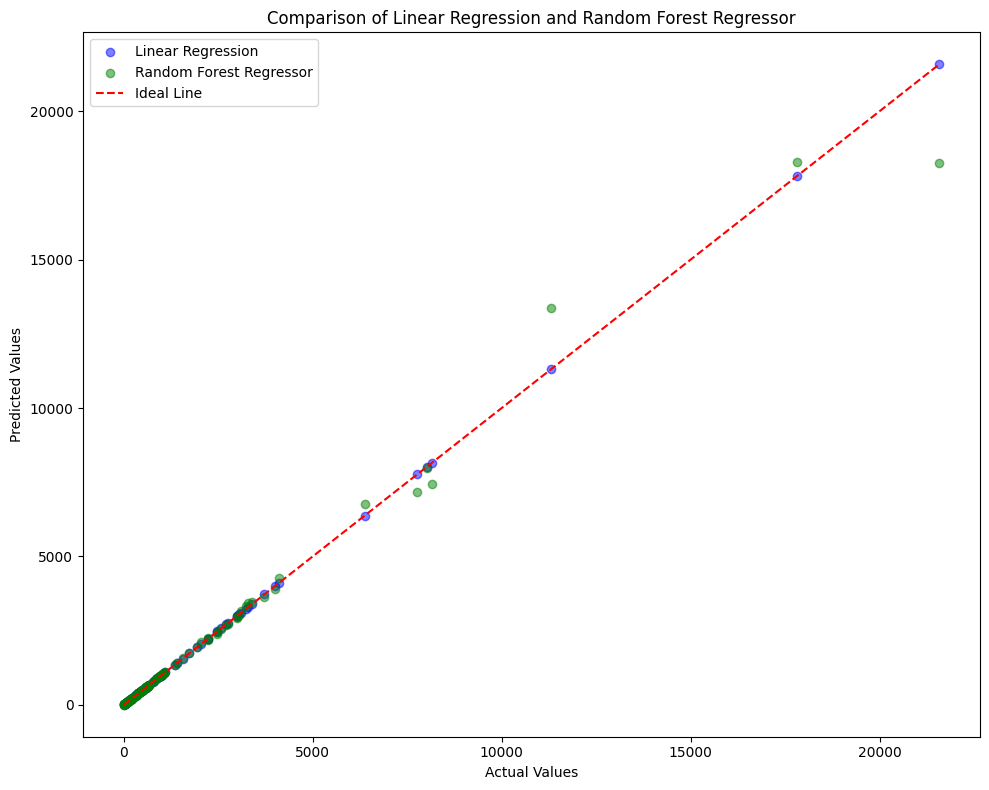

In [321]:
from sklearn.linear_model import LinearRegression
l_reg_model = LinearRegression()
l_reg_model.fit(X_train, y_train)
y_pred_l_reg = l_reg_model.predict(X_test)

from sklearn.ensemble import RandomForestRegressor
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_model.fit(X_train, y_train)
y_pred_rf_reg = rf_reg_model.predict(X_test)

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred_l_reg, color='blue', alpha=0.5, label='Linear Regression')

plt.scatter(y_test, y_pred_rf_reg, color='green', alpha=0.5, label='Random Forest Regressor')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Linear Regression and Random Forest Regressor')
plt.legend()

plt.tight_layout()
plt.show()


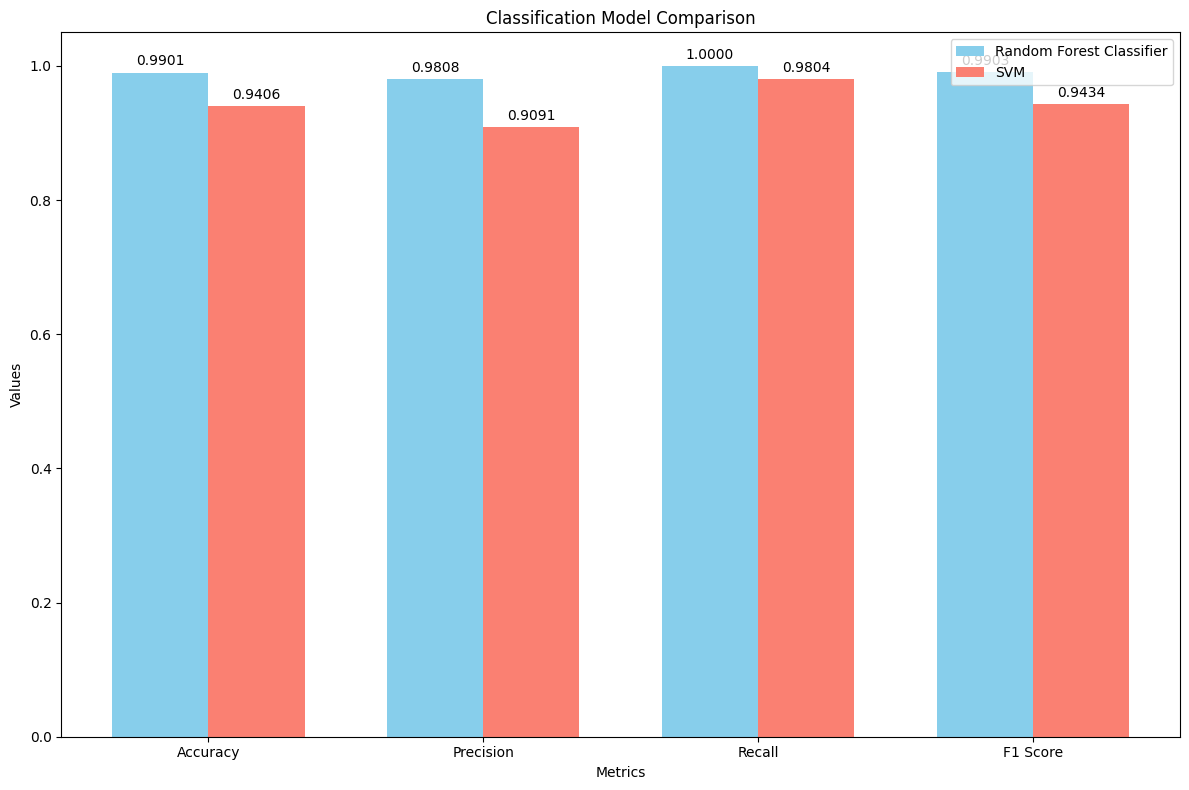

In [322]:

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
rf_class_values = [rf_class_acc, rf_class_pre, rf_class_rec, rf_class_f1]
lsvm_values = [lsvm_acc, lsvm_pre, lsvm_rec, lsvm_f1]

bar_width = 0.35
index = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(12, 8))

bars_rf_class = ax.bar(index - bar_width/2, rf_class_values, bar_width, label='Random Forest Classifier', color='skyblue')
bars_lsvm = ax.bar(index + bar_width/2, lsvm_values, bar_width, label='SVM', color='salmon')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Classification Model Comparison')
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend()

for bars in [bars_rf_class, bars_lsvm]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
